# Understanding Rolling Sum

### week 3-2

Before we proceed to modeling using excel files we downloaded, we need to learn one of the basic skills for data analysis: calculating rolling sum.

Our point of interest is to covert quarterly data to annulized data.


> *Note. source code, exmaples: KAIST Business school, Prof. Jaehoon Lee*

In [1]:
import pandas as pd

In [3]:
#This is one of the files downloaded from BOK with our custom downloader function.
df = pd.read_excel('data/gdp_growth_us.xlsx')

> If you would like to review how we constructed the custom downloader function, check [here](https://github.com/JKang918/ExchangeRatePrediction/blob/main/6.%20Downloading%20Data%20from%20Bank%20of%20Korea.ipynb). 

In [5]:
#preprocessing 1. timestamp - already done
#preprocessing 2. date-indexing - below
df = df.set_index('date')

In [6]:
df['2019-01-01':].head(10)

,gdp_growth_us
date,
2019-03-31,0.543
2019-06-30,0.830
2019-09-30,1.132
2019-12-31,0.641
2020-03-31,-1.363
2020-06-30,-7.891
2020-09-30,7.759
2020-12-31,1.035
2021-03-31,1.286


> These are growth rate for each quarter. Is there any way to annualize them?

### **Method 1. Annual Sum**

In [7]:
df.resample('YE').sum()

,gdp_growth_us
date,
1947-12-31,1.096
1948-12-31,3.846
1949-12-31,-1.521
1950-12-31,12.763
1951-12-31,5.369
...,...
2020-12-31,-0.460
2021-12-31,5.317
2022-12-31,0.655


> As we already discussed, this downsizes the sample increasing the risk of losing explanatory power for our model. 

### **Method 2. Rolling Sum**

$$
\sum_{\tau = t - 3}^t x_\tau
$$

In [8]:
df['rsum'] = df['gdp_growth_us'].rolling(4).sum()

In [9]:
df['2019-09-30':].head(3)

,gdp_growth_us,rsum
date,,
2019-09-30,1.132,2.647
2019-12-31,0.641,3.146
2020-03-31,-1.363,1.240


### **Method 3. Rolling Product**

$$
\prod_{\tau = t - 3}^t ( 1 + x_\tau ) = 1 + g_t
$$

$$
\sum_{\tau = t-3}^t \log (1 + x_\tau) = \log (1 + g_t)
$$

$$
    \therefore g_t = \exp \left\{ \sum_{\tau = t-3}^t \log (1 + x_\tau) \right\} - 1
$$

> Technically, rolling product would be accurate but if the rate is sufficiently small, the difference between rolling sum and rolling product is negligible. This can be shwon with Talyer approximation of logarithm function.

In [12]:
import numpy as np

In [13]:
df['log_growth'] = np.log(1 + df['gdp_growth_us'] / 100)

In [14]:
df['rsum_log_growth'] = df['log_growth'].rolling(4).sum()

In [15]:
df['rprod'] = (np.exp(df['rsum_log_growth']) - 1) * 100

In [16]:
#compare rsum with rproduct
df.tail()

,gdp_growth_us,rsum,log_growth,rsum_log_growth,rprod
date,,,,,
2023-06-30,0.511,2.361,0.005097,0.023540,2.381914
2023-09-30,1.194,2.896,0.011869,0.028841,2.926072
2023-12-31,0.838,3.099,0.008345,0.030856,3.133693
2024-03-31,0.351,2.894,0.003504,0.028815,2.923438
2024-06-30,0.703,3.086,0.007005,0.030724,3.120046


> As menthoned above, there is very little and insignificant difference between rolling sum and rolling product

### Comparing Rolling Sum & Rolling Product in a graph

In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.rcParams['figure.figsize'] = (10, 4)

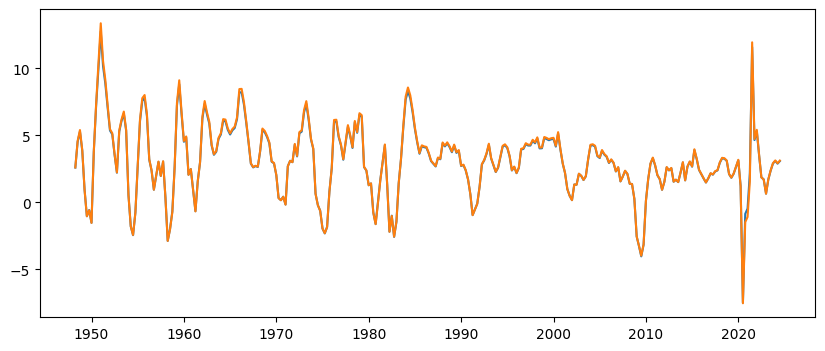

In [19]:
plt.plot(df['rsum'], label = 'Rolling Sum')
plt.plot(df['rprod'], label = 'Rolling Product')
plt.show()

> Unless there are sudden significant volatility in the market as in early 2020's, rolling sum almost perfectly overlap rolling product.\
> In the next notebook, we are going to jump directly into rolling sum instead of rolling product based on this.